# i. Perkenalan

<b>

==============================

Nama: Muhammad Iqbal Saputra

Batch: RMT-032

==============================


# ii. Import Libraries

In [1]:
%pip install feature-engine

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Libraries untuk Data Manipulation
import pandas as pd
import numpy as np

# Libraries untuk Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries untuk Statistics
from scipy import stats
from scipy.stats import pearsonr, kendalltau, spearmanr, uniform

# Libraries untuk Modeling ML
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score,KFold, StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, roc_auc_score,mean_squared_error, root_mean_squared_error, r2_score, accuracy_score , classification_report , confusion_matrix,precision_score, recall_score, f1_score,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from feature_engine.outliers import Winsorizer
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import uniform, randint
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.tree import DecisionTreeClassifier

# Library pipelines
from sklearn.pipeline import Pipeline

# Model Saving
import pickle
import json
import joblib

# Libraries untuk mengabaikan semua warning
import warnings

In [3]:
# Kode untuk mengabaikan semua warning
warnings.filterwarnings("ignore")

# iii. Data Loading

| Column | Description |
| --- | --- |
| `Age` | Usia seorang karyawan |
| `Attrition` | Kemungkinan seorang karyawan akan berhenti |
| `BusinessTravel` | Tingkat perjalanan dinas yang dilakukan seorang karyawan |
| `Department` | Departemen |
| `DistanceFromHome` | Jarak antara rumah dan kantor (KM) |
| `Education` | Tingkat pendidikan <br><br> `1` : Below College <br> `2` : College <br> `3` : Bachelor <br> `4` : Master <br> `5` : Doctor |
| `EducationField` | Bidang pendidikan |
| `EmployeeID` | Nomor ID karyawan |
| `Gender` | Jenis Kelamin |
| `JobRole` | Posisi pekerjaan |
| `JobSatisfaction` | Tingkat kepuasan saat bekerja |
| `MaritalStatus` | Status pernikahan |
| `MonthlyIncome` | Gaji per bulan (USD) |
| `NumCompaniesWorked` | Jumlah perusahaan dimana karyawan tersebut bekerja sebelum bergabung dengan IBM |
| `PercentSalaryHike` | Tingkat kenaikan gaji (%) |
| `PerformanceRating` | Tingkat kinerja karyawan <br><br> `1` : Low <br> `2` : Good <br> `3` : Excellent <br> `4` : Outstanding |
| `TotalWorkingYears` | Jumlah tahun seorang karyawan bekerja selama hidupnya |
| `WorkLifeBalance` | Tingkat keseimbangan hidup karyawan antara pekerjaan dan non pekerjaan |
| `YearsAtCompany` | Jumlah tahun dimana seorang karyawan berada di IBM |
| `YearsInCurrentRole` | Jumlah tahun dimana seorang karyawan menduduki jabatannya saat ini |
| `YearsSinceLastPromotion` | Jumlah tahun dimana seorang karyawan terakhir kali naik jabatan |
| `YearsWithCurrentManager` | Jumlah tahun dimana seorang karyawan memiliki manager yang sama |

In [4]:
# Baca dan simpan dataset pada variabel df
df = pd.read_csv('employee-attrition.csv')

# Menampilkan 5 data teratas
df.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobRole,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager
0,28,No,Travel_Rarely,Research & Development,3,3,Medical,1121,Female,Manufacturing Director,...,7655,0,17,3,10,Good,9,7,1,7
1,37,Yes,Travel_Rarely,Research & Development,11,2,Medical,1033,Female,Healthcare Representative,...,4777,5,15,3,15,Bad,1,0,0,0
2,38,No,Travel_Rarely,Sales,2,2,Marketing,1125,Male,Sales Executive,...,7351,7,16,3,10,Better,1,0,0,0
3,55,Yes,Travel_Rarely,Research & Development,2,3,Medical,787,Male,Manager,...,19859,5,13,3,24,Better,5,2,1,4
4,31,No,Travel_Rarely,Sales,5,4,Life Sciences,1673,Female,Sales Executive,...,5476,1,11,3,10,Better,10,0,0,2


In [5]:
# Menampilkan 5 data terbawah
df.tail(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobRole,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager
1465,44,No,Travel_Rarely,Research & Development,10,4,Other,40,Male,Healthcare Representative,...,6465,2,13,3,9,Best,4,2,1,3
1466,31,No,Non-Travel,Sales,2,4,Life Sciences,1324,Female,Sales Executive,...,9852,1,19,3,10,Good,10,8,9,6
1467,30,No,Travel_Rarely,Human Resources,1,3,Life Sciences,1499,Male,Human Resources,...,2064,0,21,4,6,Best,5,3,1,3
1468,50,No,Travel_Rarely,Research & Development,9,3,Life Sciences,1030,Male,Laboratory Technician,...,2380,4,18,3,8,Better,1,0,0,0
1469,58,Yes,Travel_Rarely,Research & Development,2,4,Life Sciences,825,Male,Research Director,...,19246,7,12,3,40,Better,31,15,13,8


In [6]:
# Copy data ke variabel baru
data = df.copy()

In [7]:
# Menampilkan informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Education                1470 non-null   int64 
 6   EducationField           1470 non-null   object
 7   EmployeeID               1470 non-null   int64 
 8   Gender                   1470 non-null   object
 9   JobRole                  1470 non-null   object
 10  JobSatisfaction          1470 non-null   object
 11  MaritalStatus            1470 non-null   object
 12  MonthlyIncome            1470 non-null   int64 
 13  NumCompaniesWorked       1470 non-null   int64 
 14  PercentSalaryHike        1470 non-null  

- Terdapat 1470 entries di dataset
- Tidak ada null values
- Dataset consist 13 numerical column dan 9 categorical column

In [8]:
# Crosscek apakah ada missing value
data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrentManager    0
dtype: int64

- There is no missing values

In [9]:
# Membuat kolom baru bernama 'MonthsAtCompany'
data['MonthsAtCompany'] = data['YearsAtCompany'] * 12

# Crosscek apakah kolom berhasil dibuat
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Education                1470 non-null   int64 
 6   EducationField           1470 non-null   object
 7   EmployeeID               1470 non-null   int64 
 8   Gender                   1470 non-null   object
 9   JobRole                  1470 non-null   object
 10  JobSatisfaction          1470 non-null   object
 11  MaritalStatus            1470 non-null   object
 12  MonthlyIncome            1470 non-null   int64 
 13  NumCompaniesWorked       1470 non-null   int64 
 14  PercentSalaryHike        1470 non-null  

In [10]:
# Cek data duplikat
data.duplicated().sum()

0

- Tidak terdapat data duplikat

# iv. Exploratory Data Analysis (EDA)

## Descriptive Stats

In [11]:
# Menampilkan deskriptif statistik untuk kolom-kolom numerik
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeID,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0
PerformanceRating,1470.0,3.153741,0.360824,3.0,3.00,3.0,3.00,4.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.00,10.0,15.00,40.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.00,5.0,9.00,40.0


1. Age
    - rata-rata umur karyawan 36.92 Tahun
    - umur karyawan bervariasi dari umur 18 sampai dengan 60 tahun
2. DistanceFromHome
    - rata-rata jarak rumah ke kantor adalah 9.19km
    - jarak berkisar antara 1km sampai 29km
3. Education
    - rata-rata tingkat pendidikan 2.91 yang artinya sebagian besar karyawan memiliki pendidikan setara dengan College atau Bachelor (sedang kuliah atau sudah lulus S1)
4. MonthlyIncome
    - rata-rata pendapatan bulanan adalah sekitar $6502
    - pendapatan bulanan berkisar antara $1009 sampai $19999
5. NumCompaniesWorked
    - rata-rata karyawan pernah berkerja di sekitar 2-3 perusahaan
    - jumlah berkisar antara 0 - 9
6. PercentSalaryHike
    - rata-rata kenaikan gaji sekitar 15.21%
    - kenaikan gaji berkisar dari 11% - 25%
7. TotalWorkingYears
    - rata-rata karyawan telah berkerja selama 11.28 tahun
    - total tahun karyawan berkerja berkisar 0 - 40 tahun
8. YearsAtCompany
    - rata-rata karyawan telah berkerja di perusahaan IBM selama 7.01 tahun
    - lama bekerja di perusahaan berkisar 0 - 40 tahun
9. YearsInCurrentRole
    - rata-rata karyawan telah berkerja di role ini selama 4.22 tahun
    - lama bekerja di role saat ini berkisar antara 0 - 18 tahun
10. YearsSinceLastPromotion
    - rata-rata waktu sejak kenaikan terakhir adalah 2.19 tahun
    - waktu berkisar antara 0 - 15 tahun
11. YearsWithCurrentManager
    - rata-rata karyawan telah berkerja dengan manajer selama 4.12 tahun
    - waktu karyawan berkerja dengan manager yg sama berkisar antara 0 - 17 tahun

## Employee Satisfication Level

In [12]:
# Fungsi untuk mengkategorikan durasi kerja karyawan
def categorize_duration(months):
    if months <= 8:
        return 'unsatisfied'
    elif months <= 18:
        return 'decent'
    elif months <= 48:
        return 'satisfied'
    elif months <= 120:
        return 'loyal'
    else:
        return 'devoted'

# Membuat kolom baru berdasarkan tingkat kepuasan
data['DurationCategory'] = data['MonthsAtCompany'].apply(categorize_duration)

In [13]:
# Menghitung jumlah unique value
duration_counts = data['DurationCategory'].value_counts()

# Menampilkan hasil
duration_counts

DurationCategory
loyal          644
satisfied      365
devoted        246
decent         171
unsatisfied     44
Name: count, dtype: int64

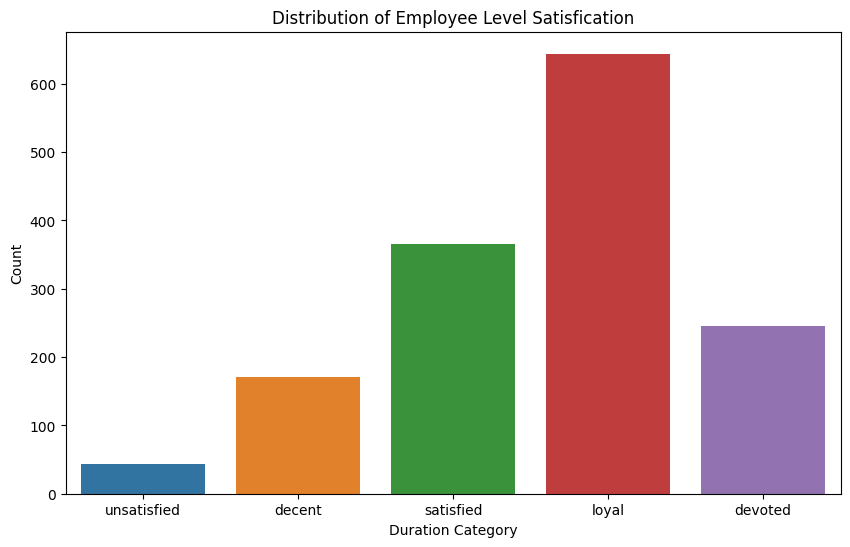

In [14]:
# Visualisasi hasil
plt.figure(figsize=(10,6))
sns.countplot(x='DurationCategory', data=data, order=['unsatisfied','decent','satisfied','loyal','devoted'])
plt.title('Distribution of Employee Level Satisfication')
plt.xlabel('Duration Category')
plt.ylabel('Count')
plt.show()

**Kesimpulan**

- Mayoritas karyawan masuk kedalam kategori `loyal` yang berarti banyak karyawan yang setia di perusahaan
- Fokus pada kategori `unsatisfied` dan `decent` untuk meningkatkan retensi karyawan

## New Formula Salary Hike

In [15]:
# Membuat kolom baru sekaligus menghitung dengan formula baru
data['NewPercentSalaryHike'] = 5 + (data['PerformanceRating'] * 2) + (df['YearsAtCompany'] / 5)

# Menampilkan beberapa baris
data[['PercentSalaryHike', 'NewPercentSalaryHike']].head()

,PercentSalaryHike,NewPercentSalaryHike
0,17,12.8
1,15,11.2
2,16,11.2
3,13,12.0
4,11,13.0


<function matplotlib.pyplot.show(close=None, block=None)>

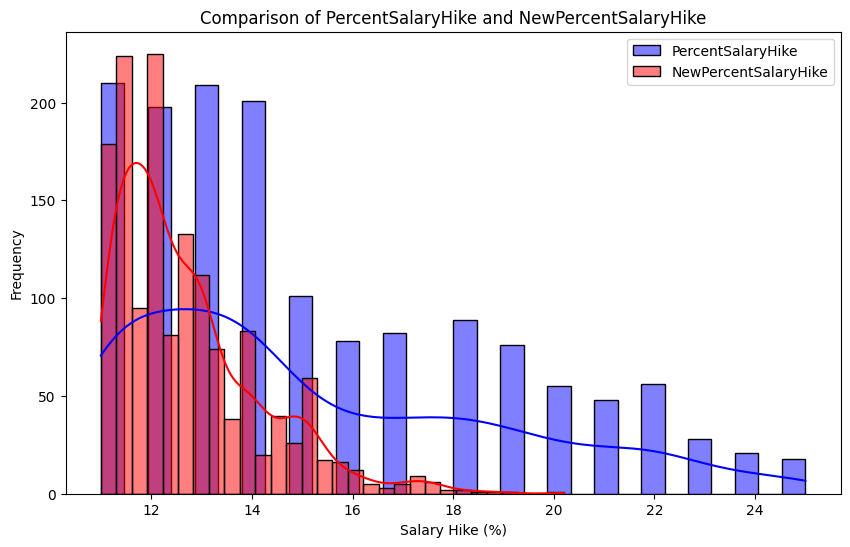

In [16]:
# Visualisasi perbandingan
plt.figure(figsize=(10,6))
sns.histplot(data['PercentSalaryHike'], bins=30,kde=True,color='blue',label='PercentSalaryHike')
sns.histplot(data['NewPercentSalaryHike'], bins=30,kde=True,color='red',label='NewPercentSalaryHike')
plt.title('Comparison of PercentSalaryHike and NewPercentSalaryHike')
plt.xlabel('Salary Hike (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

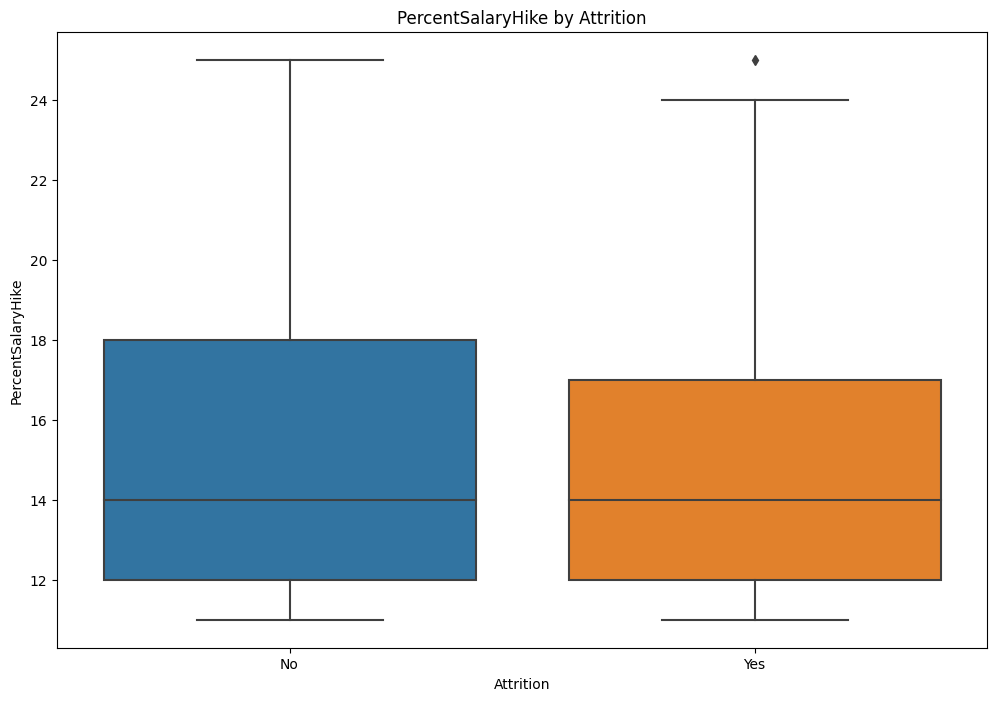

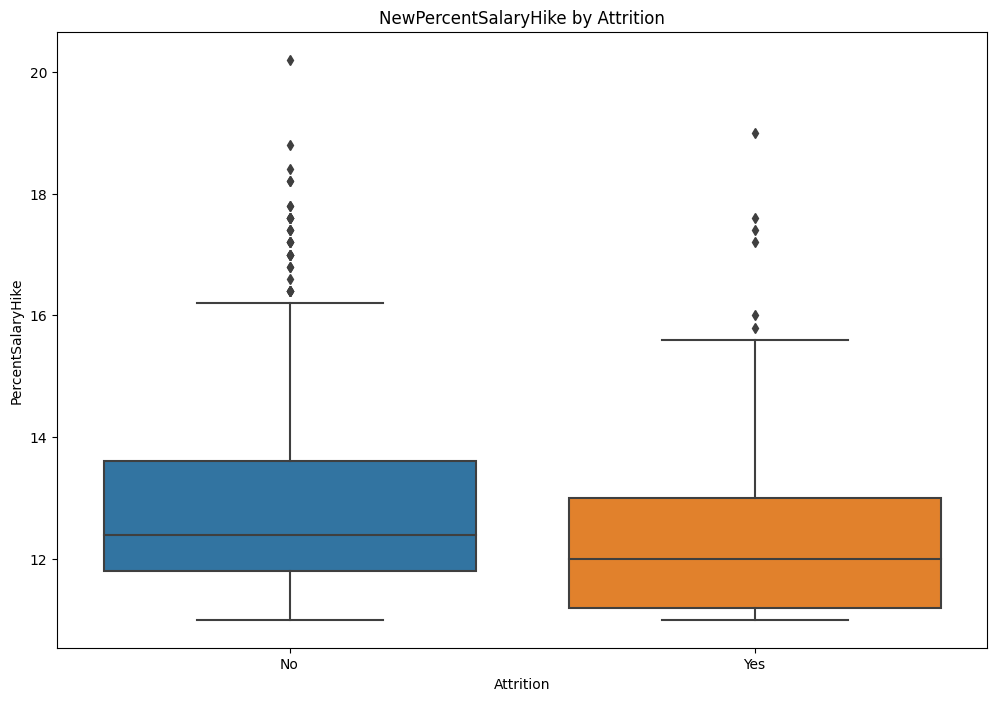

In [17]:
# Membuat boxplot distribusi PercentSalaryHike berdasarkan Attrition
plt.figure(figsize=(12,8))
sns.boxplot(x='Attrition',y='PercentSalaryHike', data=data)
plt.title('PercentSalaryHike by Attrition')
plt.xlabel('Attrition')
plt.ylabel('PercentSalaryHike')
plt.show

# Membuat boxplot distribusi NewPercentSalaryHike berdasarkan Attrition
plt.figure(figsize=(12,8))
sns.boxplot(x='Attrition',y='NewPercentSalaryHike', data=data)
plt.title('NewPercentSalaryHike by Attrition')
plt.xlabel('Attrition')
plt.ylabel('PercentSalaryHike')
plt.show

**Kesimpulan**

1. Hasil dari visualisasi boxplot diatas hampir terlihat sama, ini menunjukan formula kenaikan gaji yang baru tidak memberi pengaruh signifikan terhadap keputusan karyawan untuk lanjut berkerja atau tidak

**Rekomendasi**
- Selain kenaikan gaji, mungkin kita perlu mempertimbangkan untuk meningkatkan kepuasan kerja melalui pengembangan karir, lingkungan kerja yang positif, worklifebalance dan lain sebagainya

# v. Feature Engineering

## Handling Cardinality

In [18]:
# Definisikan kolom kategorik dan numerik
cat_columns = data.select_dtypes(include=['object']).columns.tolist()
num_columns = data.select_dtypes(include=np.number).columns.tolist()

# Menampilkan kolom kategorik dan numerik
print(f"Numerical Columns = {num_columns}")
print(f"Categorical Columns = {cat_columns}")

Numerical Columns = ['Age', 'DistanceFromHome', 'Education', 'EmployeeID', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrentManager', 'MonthsAtCompany', 'NewPercentSalaryHike']
Categorical Columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'WorkLifeBalance', 'DurationCategory']


In [19]:
# Menampilkan unique value dari setiap kolom kategorik
for i in cat_columns:
    unique_values = data[i].nunique()
    print(f" {i} = {unique_values}")

 Attrition = 2
 BusinessTravel = 3
 Department = 3
 EducationField = 6
 Gender = 2
 JobRole = 9
 JobSatisfaction = 4
 MaritalStatus = 3
 WorkLifeBalance = 4
 DurationCategory = 5


- Kolom `JobRole` memiliki cardinality tinggi namun kita tidak perlu mengelompokkanya
- Kolom selain `JobRole` normal

## Splitting Between X and Y

In [20]:
# Memisahkan label X dan y
X = data.drop('Attrition', axis = 1)
y = data['Attrition']

In [21]:
# Menampilkan data teratas X
X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobRole,JobSatisfaction,...,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,MonthsAtCompany,DurationCategory,NewPercentSalaryHike
0,28,Travel_Rarely,Research & Development,3,3,Medical,1121,Female,Manufacturing Director,Medium,...,3,10,Good,9,7,1,7,108,loyal,12.8
1,37,Travel_Rarely,Research & Development,11,2,Medical,1033,Female,Healthcare Representative,Medium,...,3,15,Bad,1,0,0,0,12,decent,11.2
2,38,Travel_Rarely,Sales,2,2,Marketing,1125,Male,Sales Executive,Medium,...,3,10,Better,1,0,0,0,12,decent,11.2
3,55,Travel_Rarely,Research & Development,2,3,Medical,787,Male,Manager,Low,...,3,24,Better,5,2,1,4,60,loyal,12.0
4,31,Travel_Rarely,Sales,5,4,Life Sciences,1673,Female,Sales Executive,Very High,...,3,10,Better,10,0,0,2,120,loyal,13.0


In [22]:
# Menampilkan data teratas y
y.head()

0     No
1    Yes
2     No
3    Yes
4     No
Name: Attrition, dtype: object

## Splitting Between Train and Test

In [23]:
# Membagi X_train, X_test, y_train dan y_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=43)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (1176, 24)
Test Size (294, 24)


- Train size memiliki 1176 entries dan 24 kolom, dan test size memiliki 294 entries dan 24 kolom

## Handling Missing value

In [24]:
# Menampilkan null values
X_train.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrentManager    0
MonthsAtCompany            0
DurationCategory           0
NewPercentSalaryHike       0
dtype: int64

In [25]:
# Menampilkan null values
X_test.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrentManager    0
MonthsAtCompany            0
DurationCategory           0
NewPercentSalaryHike       0
dtype: int64

In [26]:
# Menampilkan null values
y_train.isnull().sum()

0

In [27]:
# Menampilkan null values
y_test.isnull().sum()

0

- Tidak terdapat missing values

## Handling Outliers

In [28]:
# Definisikan ulang cat_columns dan num_columns
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()

print('Numerical Columns', num_columns)
print('Categorical Columns', cat_columns)

Numerical Columns ['Age', 'DistanceFromHome', 'Education', 'EmployeeID', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrentManager', 'MonthsAtCompany', 'NewPercentSalaryHike']
Categorical Columns ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'WorkLifeBalance', 'DurationCategory']


In [29]:
# Membuat variable untuk menyimpan normal distribution
data_normal = []
column_normal = []

# Membuat variable untuk menyimpan normal distribution skewed distribution
data_skewed = []
column_skewed = []

# Melakukan iterasi untuk membagi kolom yang terdistribusi normal dan skew
for num in num_columns:
    skewness = X_train[num].skew()
    
    if skewness <= 0.5 and skewness >= -0.5:            
        column_normal.append(num)
        data_normal.append([num, skewness])
        
    elif skewness < -0.5 and skewness > -1: 
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    elif skewness > 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    elif skewness < -1 or skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])
        

In [30]:
# Menampilkan kolom yang terdistribusi normal
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])

,normal_distribution,skewness
0,Age,0.412487
1,Education,-0.296364
2,EmployeeID,0.008206


In [31]:
# Menampilkan kolom yang terdistribusi skew
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])

,skewed_distribution,skewness,rate
0,DistanceFromHome,0.958492,low
1,MonthlyIncome,1.365339,high
2,NumCompaniesWorked,1.037810,high
3,PercentSalaryHike,0.834911,low
4,PerformanceRating,1.948019,high
5,TotalWorkingYears,1.130795,high
6,YearsAtCompany,1.758367,high
7,YearsInCurrentRole,0.907936,low
8,YearsSinceLastPromotion,1.964438,high
9,YearsWithCurrentManager,0.837057,low


In [32]:
# List low variation kolom
low_variation_column = ['PerformanceRating']
# Menghapus column dengan low variation di skewed column dan menambahkan ke normal column
for col in low_variation_column:
    column_skewed.remove(col)
    column_normal.append(col)

- Dikarnakan kolom `PerformanceRating` memiliki nilai varians yang kecil, maka kita pindahkan ke distribusi normal

In [33]:
# Capping Method for Normal Distribution  
winsorizer_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=column_normal,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal.transform(X_test)

- Capping kolom yang terdistribusi normal menggunakan `gaussian capping method`

In [34]:
# Capping Method for Skewed Distribution  
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=column_skewed)

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

In [35]:
# Fungsi Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):

    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='orange')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='orange')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [36]:
# Mendefinisikan fungsi outlier_handling_plot_comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Plot Histogram Before
    sns.histplot(df_before[variable], ax=axes[0, 0], kde=True)
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], ax=axes[0, 1], kde=True)
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout()
    plt.show()

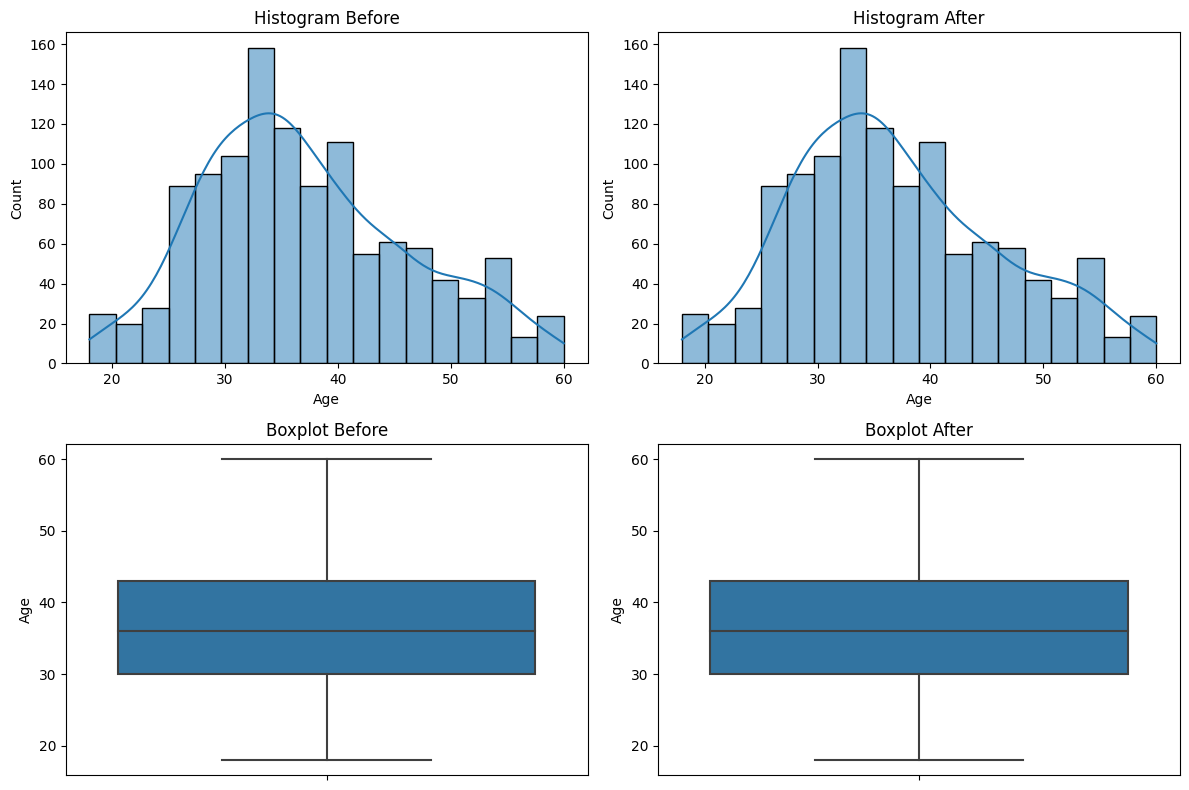

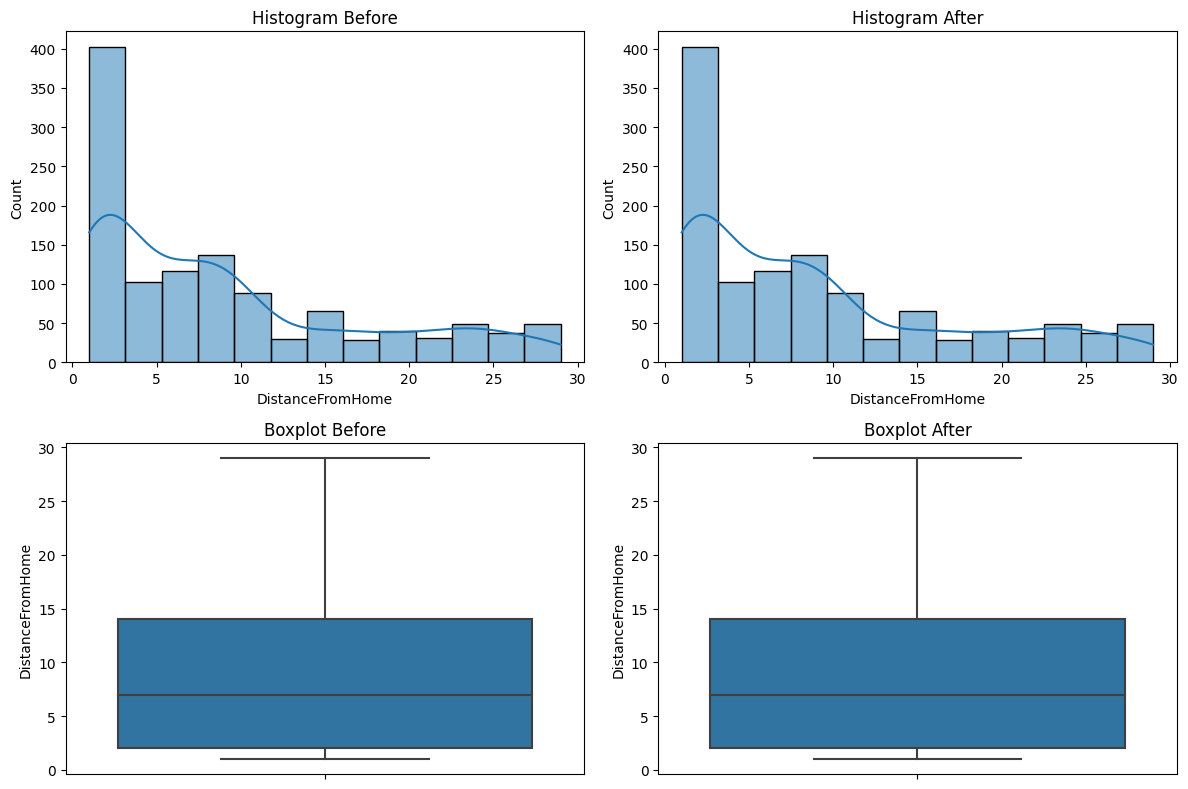

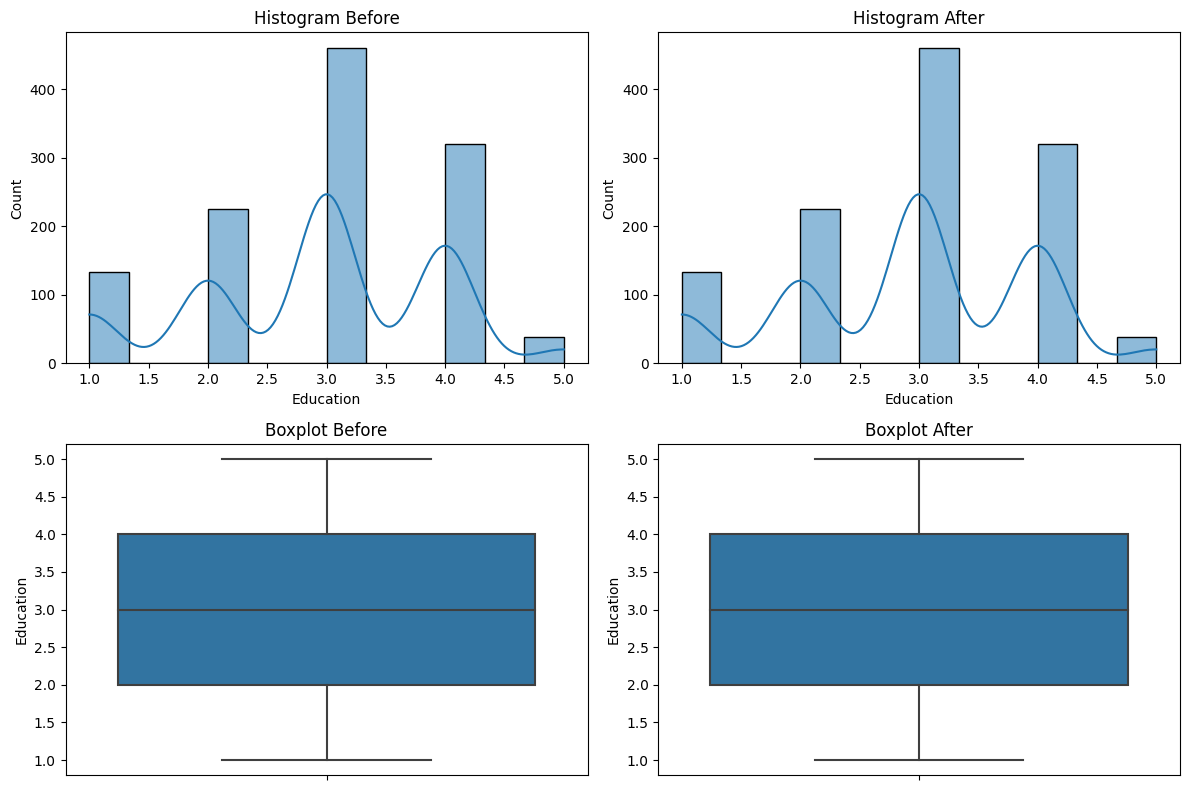

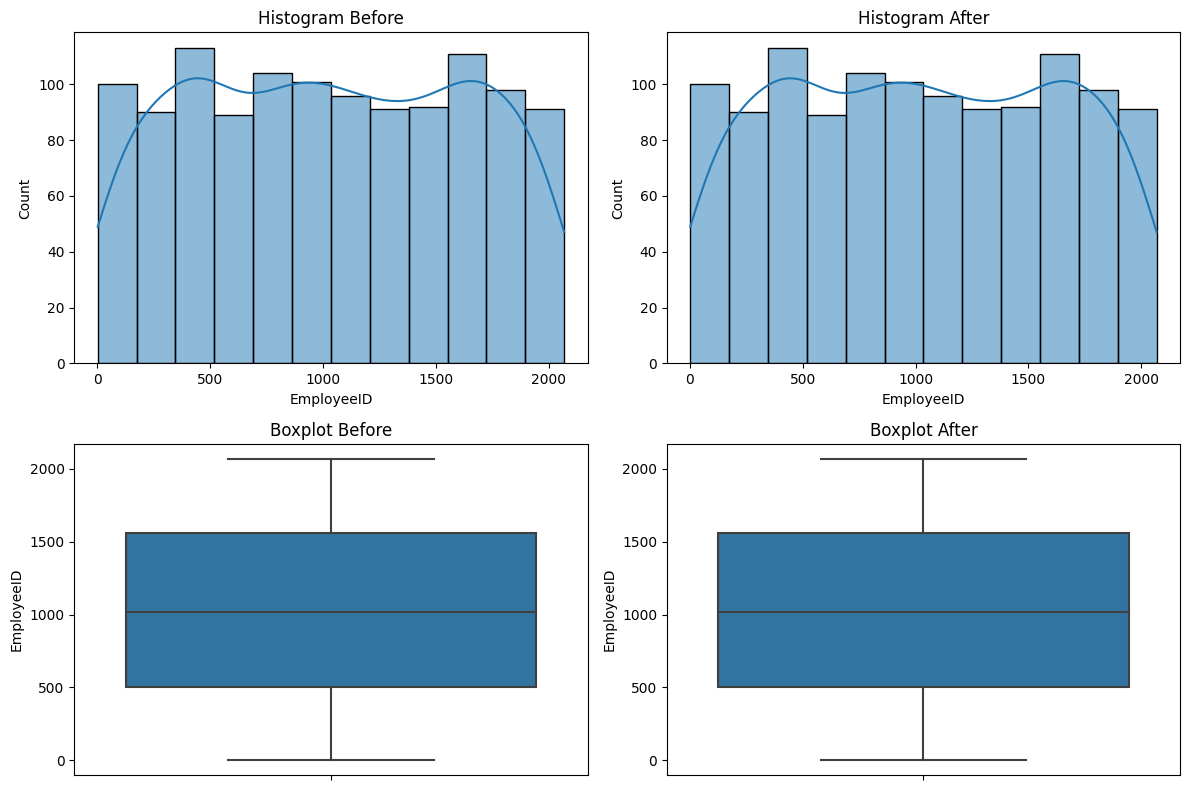

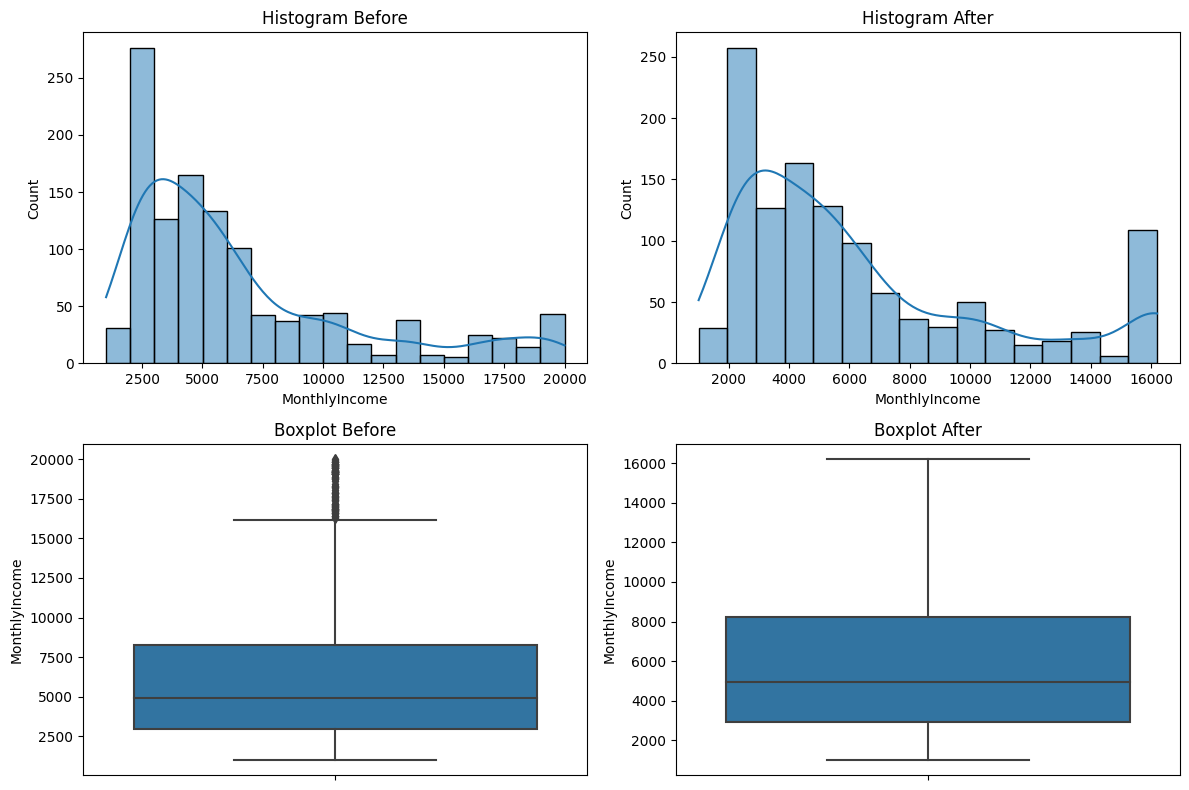

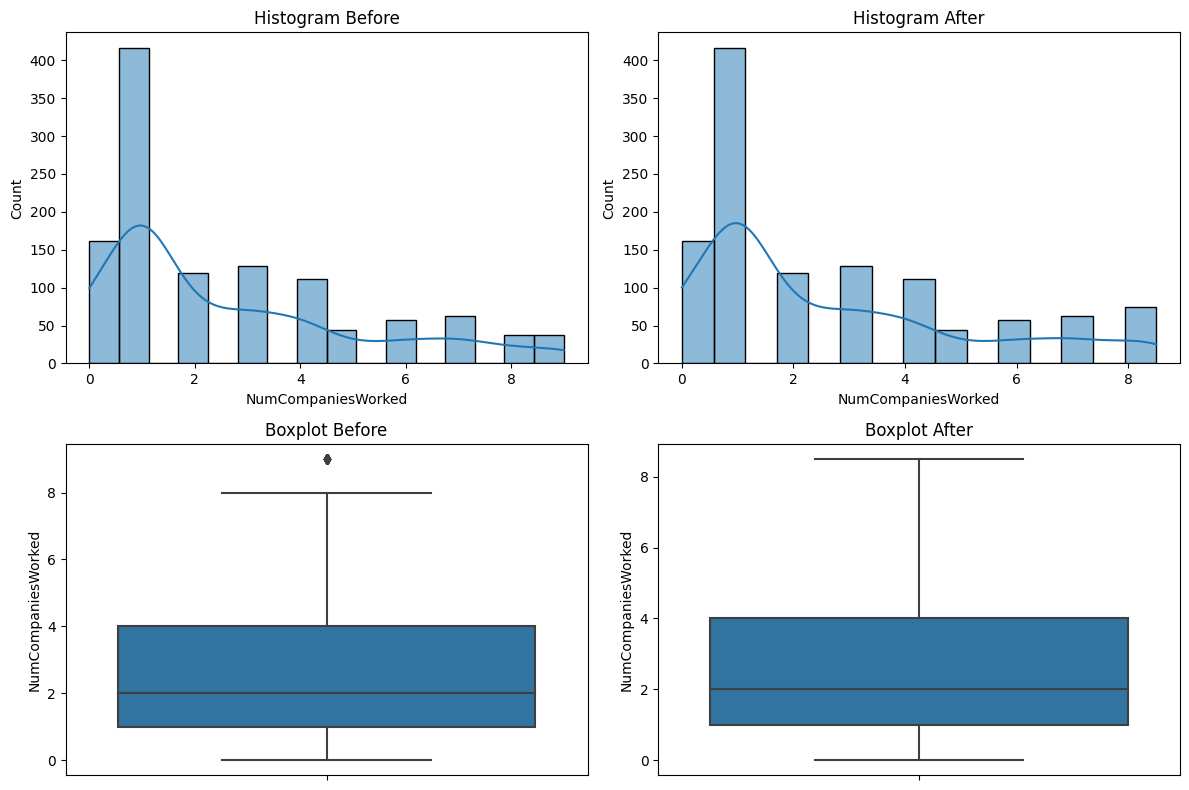

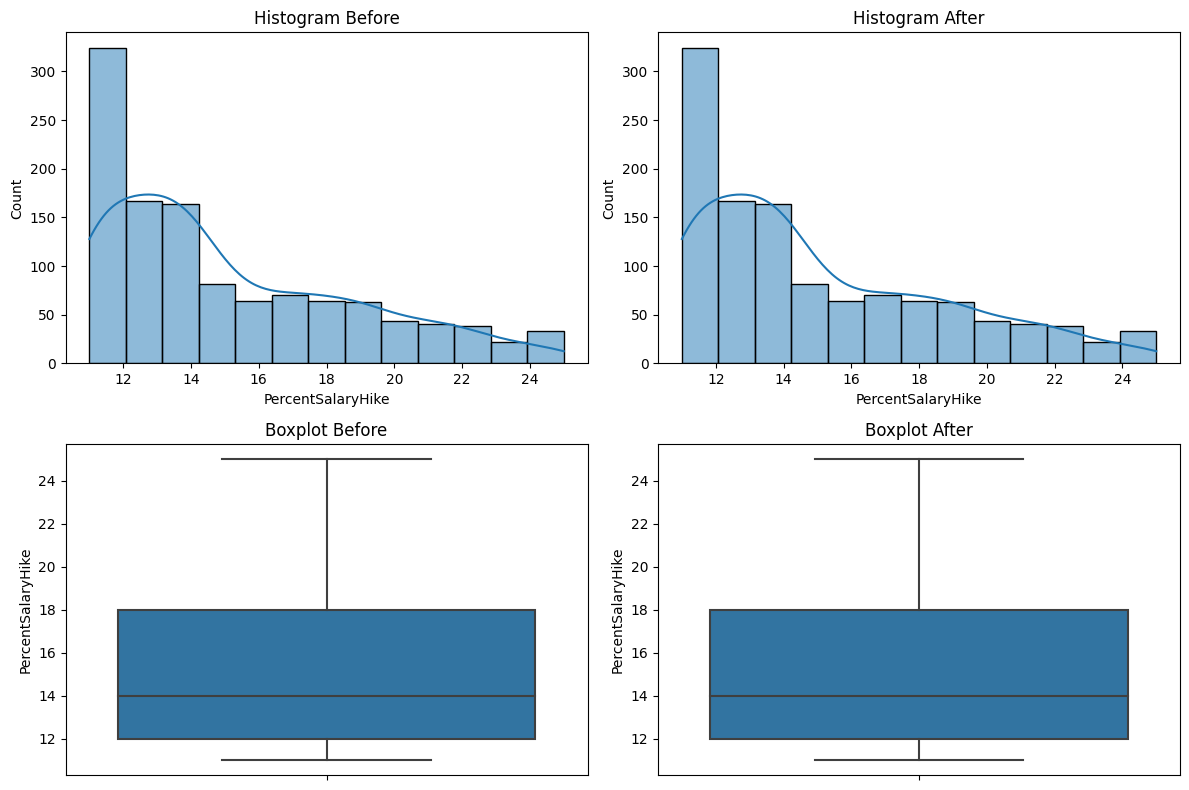

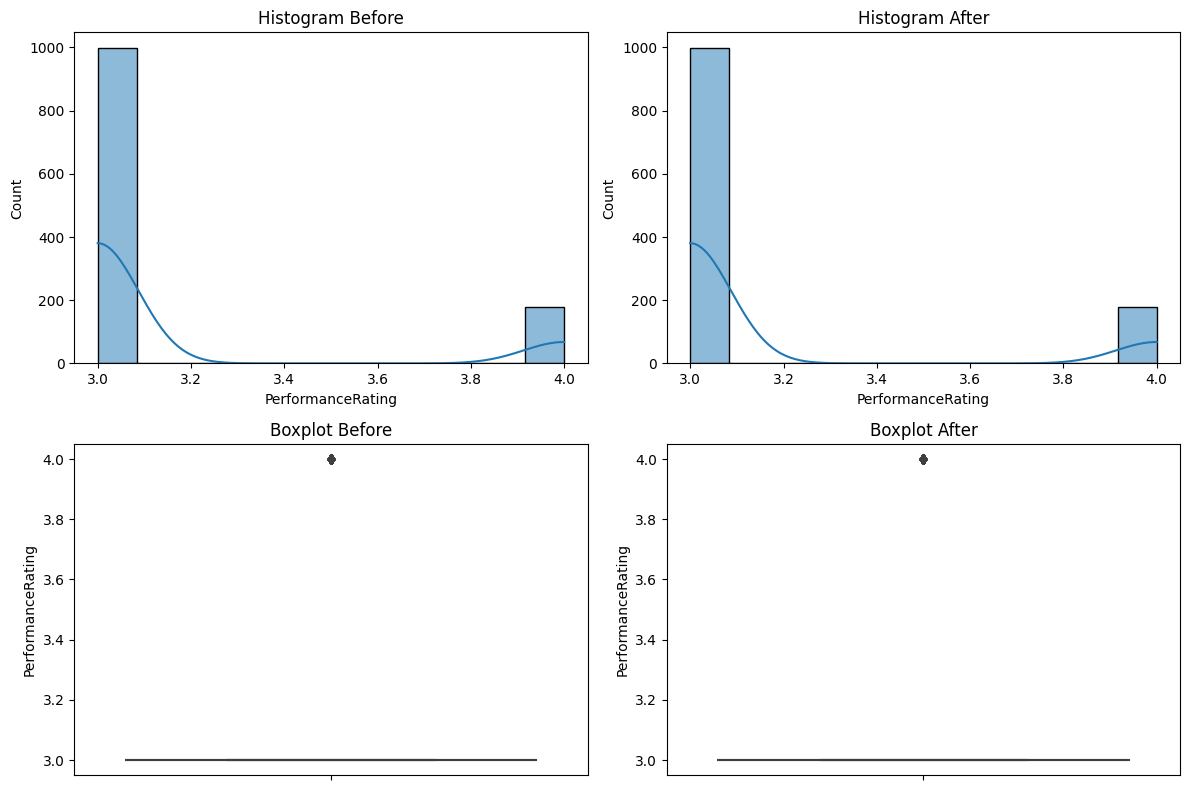

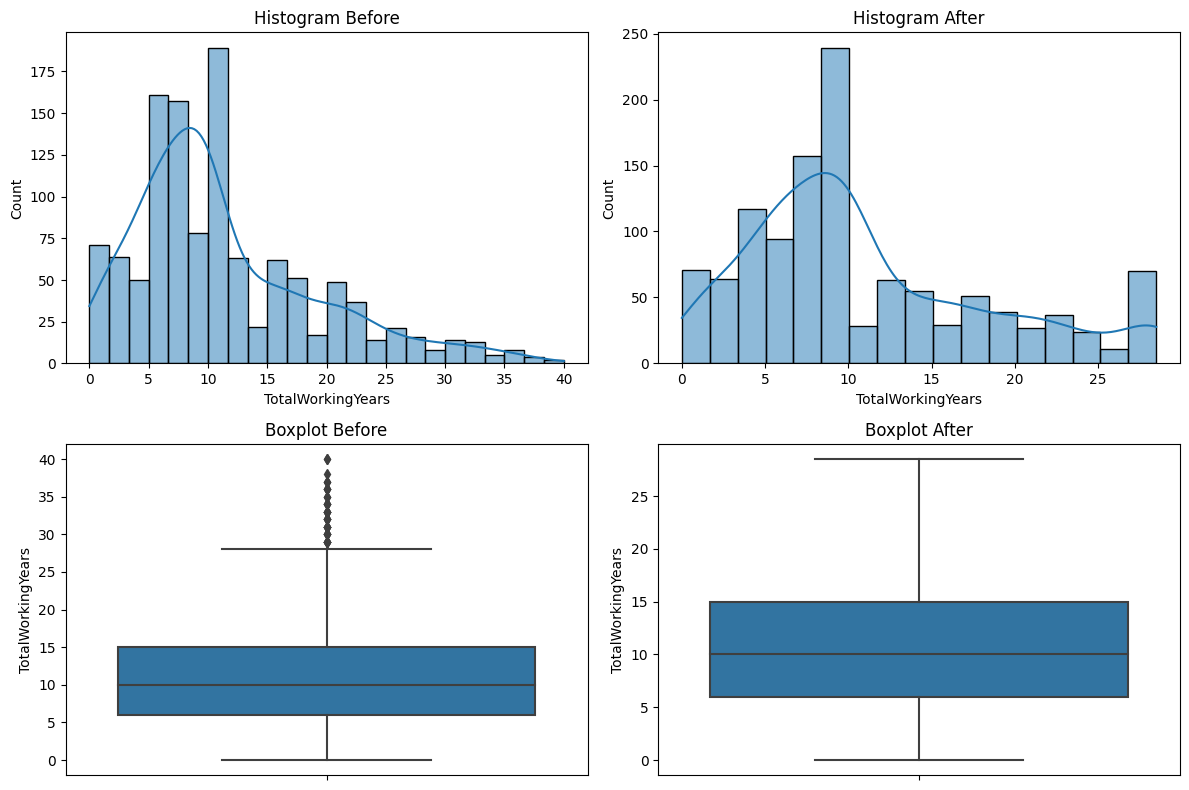

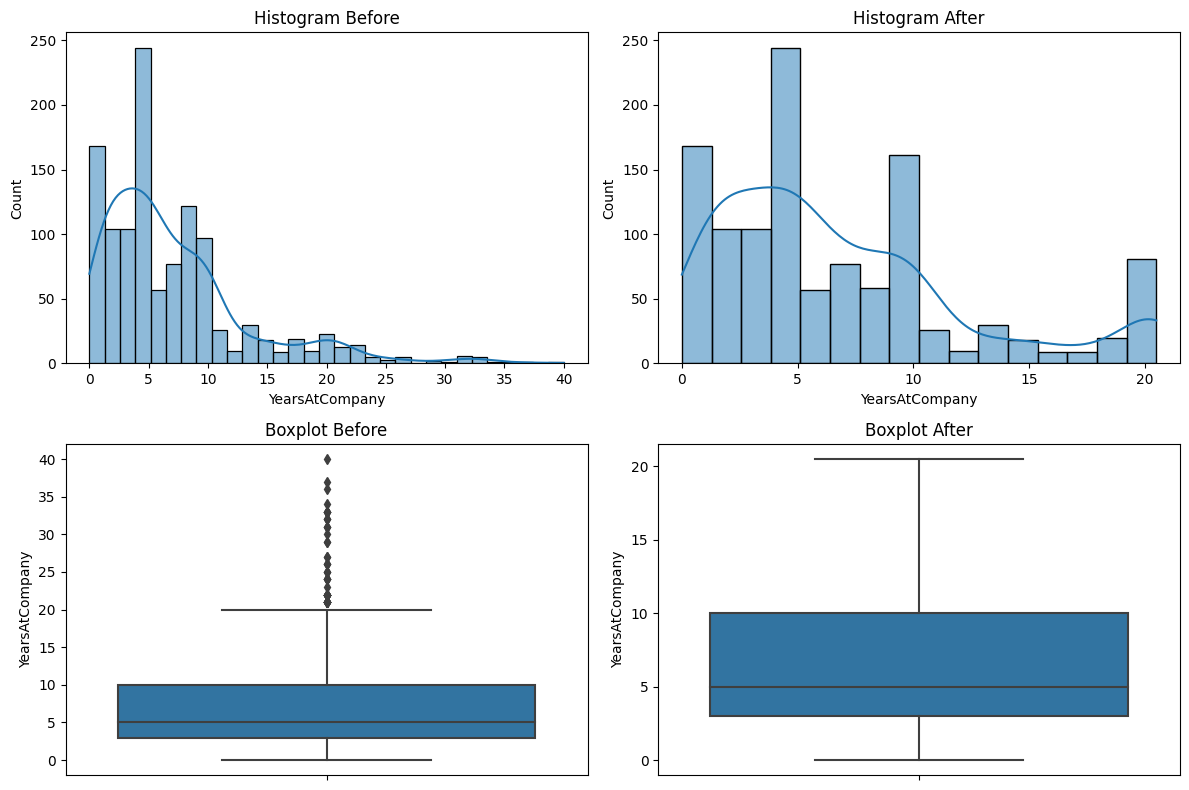

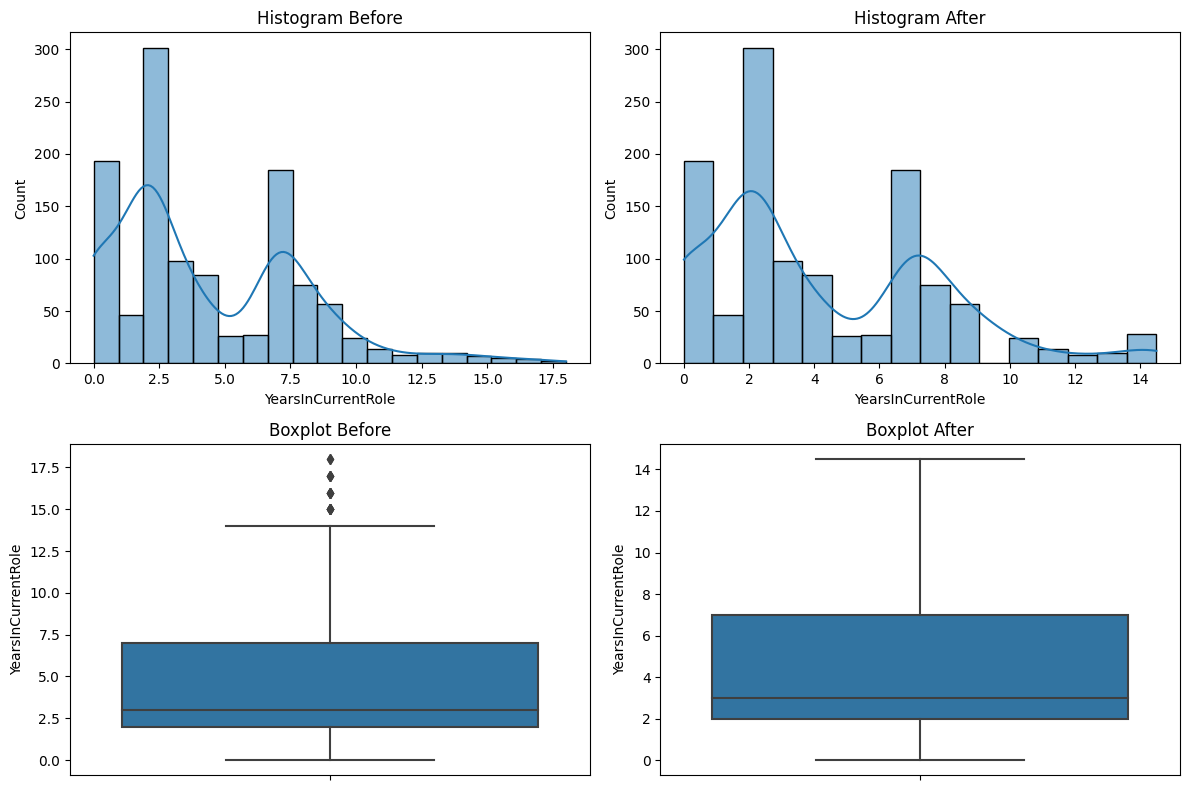

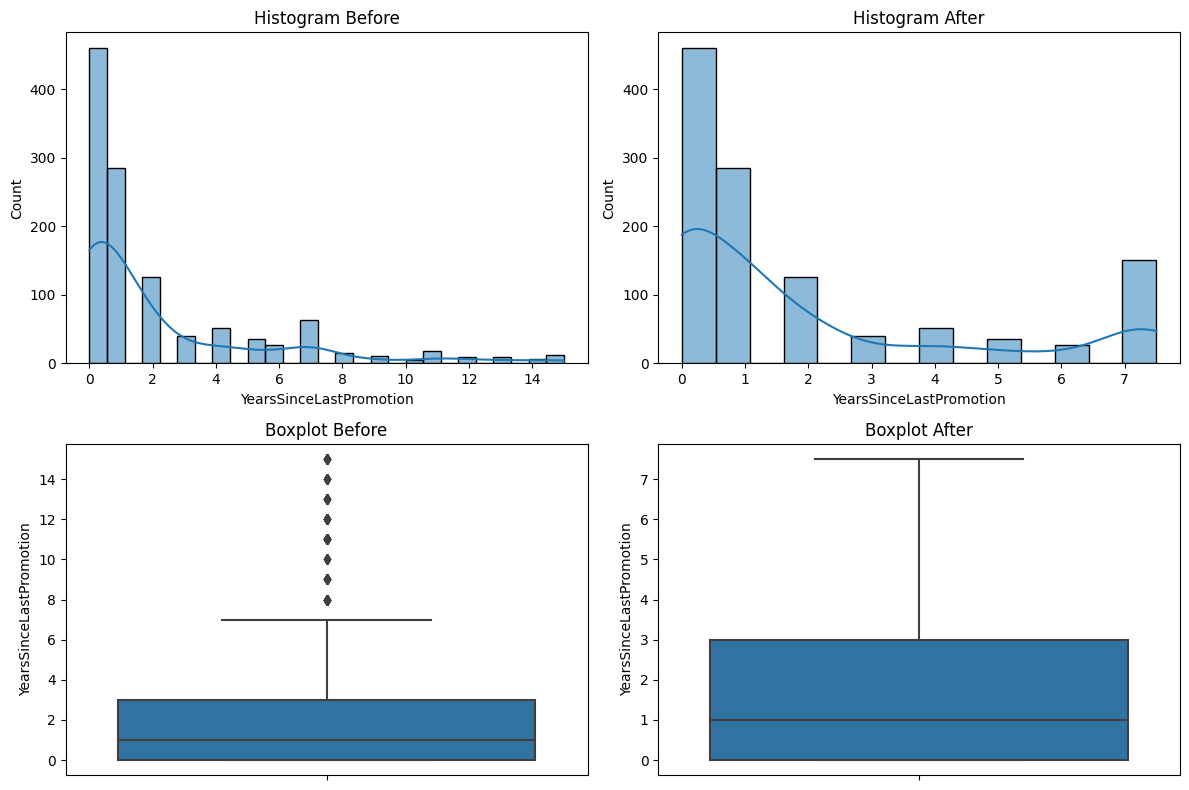

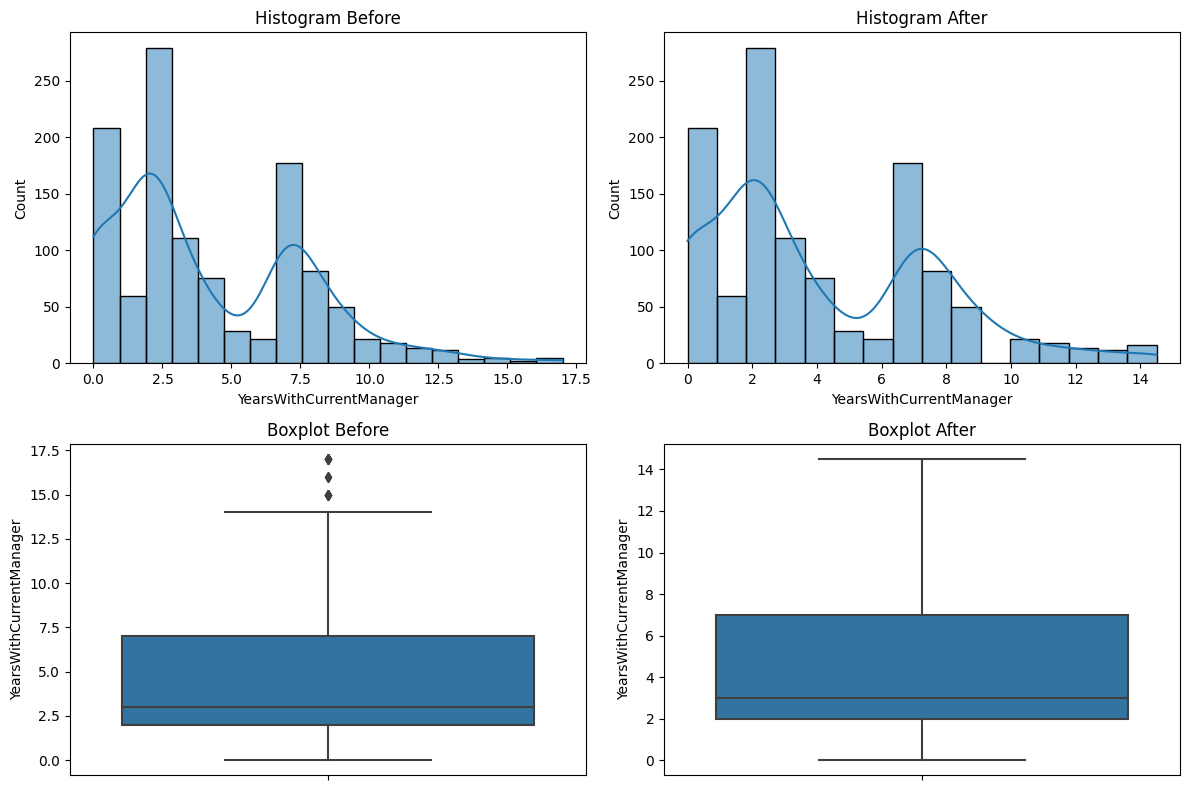

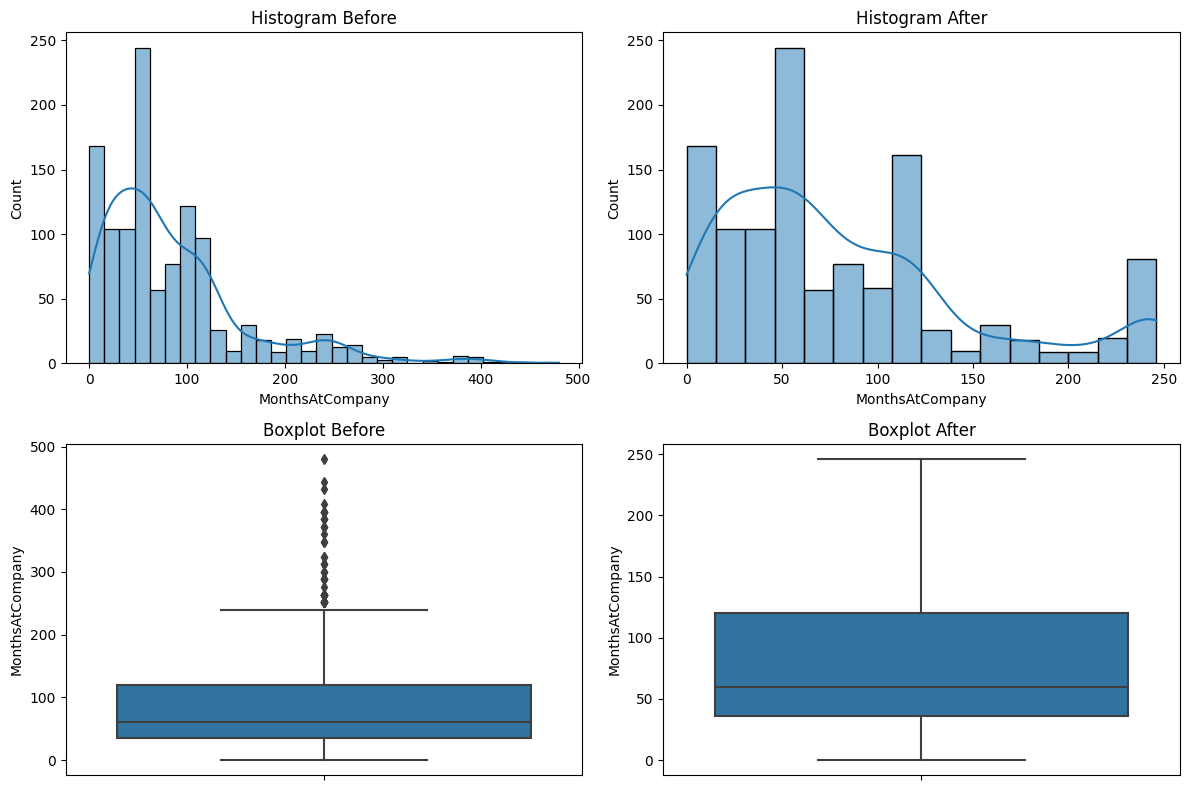

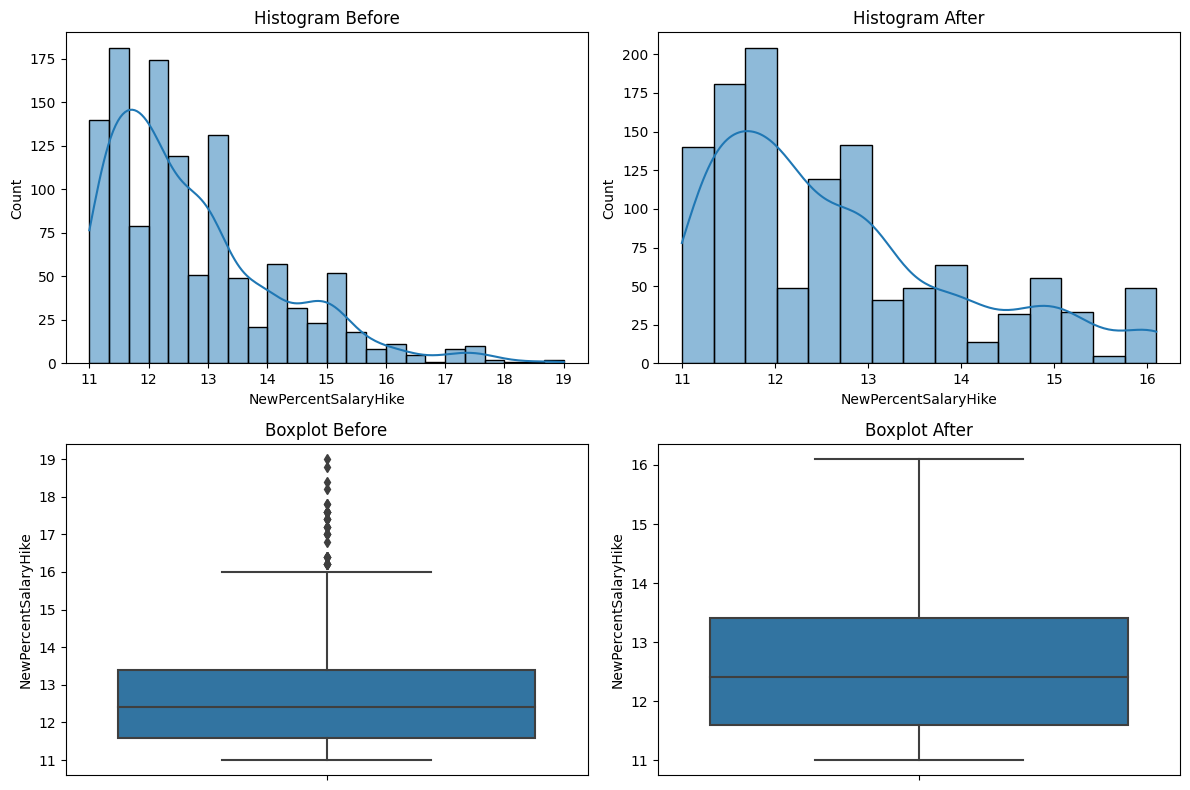

In [37]:
# Menampilkan hasil visualisasi before dan after capping
for num in X_train.select_dtypes(include=['float64', 'int64']).columns:
    outlier_handling_plot_comparison(X_train, X_train_capped, num)

## Feature Selection

In [38]:
# Splitting between numerical and categorical columns
cat_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'WorkLifeBalance', 'DurationCategory']
num_columns = [col for col in X_train_capped.columns if col not in cat_columns]


print('Categorical Columns: ', cat_columns)
print('Numcerical Columns: ', num_columns)

Categorical Columns:  ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'WorkLifeBalance', 'DurationCategory']
Numcerical Columns:  ['Age', 'DistanceFromHome', 'Education', 'EmployeeID', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrentManager', 'MonthsAtCompany', 'NewPercentSalaryHike']


In [39]:
# Splitting the train and test features into categorical and numerical columns
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

In [40]:
# Check data
X_train_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,WorkLifeBalance,DurationCategory
1159,Travel_Frequently,Research & Development,Medical,Male,Research Director,Low,Divorced,Good,devoted
10,Travel_Frequently,Research & Development,Technical Degree,Male,Research Scientist,Very High,Single,Better,decent
968,Travel_Frequently,Research & Development,Life Sciences,Female,Laboratory Technician,Medium,Married,Better,satisfied
881,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Low,Married,Better,loyal
679,Travel_Frequently,Research & Development,Life Sciences,Female,Laboratory Technician,High,Married,Better,loyal


In [41]:
# Check data
X_train_num.head()

,Age,DistanceFromHome,Education,EmployeeID,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,MonthsAtCompany,NewPercentSalaryHike
1159,34,15,3,1485,16198.875,7.0,14,3,16.0,14.0,8.0,6.0,9.0,168,13.8
10,30,4,3,514,2285.000,8.5,23,4,3.0,1.0,0.0,0.0,0.0,12,13.2
968,29,2,1,1513,3180.000,0.0,13,3,4.0,3.0,2.0,0.0,2.0,36,11.6
881,37,10,3,486,3452.000,6.0,20,4,17.0,5.0,4.0,0.0,3.0,60,14.0
679,24,7,3,647,2886.000,1.0,16,3,6.0,6.0,3.0,1.0,2.0,72,12.2


In [42]:
# Finding the correlation between categorical columns and Y Train using Kendall Tau's correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_cat_cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretation.append('Significant')
    selected_cat_cols.append(col)
  else :
    interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,BusinessTravel,-0.027446,3.316164e-01,Not Significant
1,Department,0.069678,1.499344e-02,Significant
2,EducationField,0.013331,6.188139e-01,Not Significant
3,Gender,0.019977,4.934781e-01,Not Significant
4,JobRole,0.067226,8.300208e-03,Significant
5,JobSatisfaction,-0.060573,2.338276e-02,Significant
6,MaritalStatus,0.176212,1.834499e-10,Significant
7,WorkLifeBalance,-0.037270,1.790425e-01,Not Significant
8,DurationCategory,-0.002512,9.254175e-01,Not Significant


- Untuk correlation test numerical data, kita akan menggunakan perason dan spearman correlation. Untuk kolom yang terdistribusi normal menggunakan pearson dan kolom yang skew menggunakan spearman

In [43]:
# Mengubah nilai Yes menjadi 1 dan No menjadi 0 di kolom y_train
y_train = y_train.apply(lambda x: 1 if x == 'Yes' else 0)
y_test = y_test.apply(lambda x: 1 if x == 'Yes' else 0)

# Finding the correlation between numerical columns and Y Train using pearsonr and spearmanr correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_num_cols = []

for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:                    
    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')
  else:                                                     
    #For Skewed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,Age,-0.161731,2.445989e-08,Significant
1,DistanceFromHome,0.087315,2.728128e-03,Significant
2,Education,-0.030701,2.928221e-01,Not Significant
3,EmployeeID,-0.011838,6.850886e-01,Not Significant
4,MonthlyIncome,-0.207162,7.251684e-13,Significant
5,NumCompaniesWorked,0.010276,7.248074e-01,Not Significant
6,PercentSalaryHike,-0.003625,9.011855e-01,Not Significant
7,PerformanceRating,0.026311,3.673379e-01,Not Significant
8,TotalWorkingYears,-0.190767,4.234334e-11,Significant
9,YearsAtCompany,-0.191717,3.377282e-11,Significant


In [44]:
# Updating Numerical and Categorical Columns
X_train_cat = X_train_cat[selected_cat_cols]
X_train_num = X_train_num[selected_num_cols]

X_test_cat = X_test_cat[selected_cat_cols]
X_test_num = X_test_num[selected_num_cols]

In [45]:
# Show selected data
X_train_cat

,Department,JobRole,JobSatisfaction,MaritalStatus
1159,Research & Development,Research Director,Low,Divorced
10,Research & Development,Research Scientist,Very High,Single
968,Research & Development,Laboratory Technician,Medium,Married
881,Research & Development,Laboratory Technician,Low,Married
679,Research & Development,Laboratory Technician,High,Married
...,...,...,...,...
16,Human Resources,Human Resources,Low,Married
58,Sales,Sales Representative,Very High,Single
277,Research & Development,Manager,High,Single
255,Research & Development,Research Scientist,High,Single


In [46]:
# Show selected data
X_train_num

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,MonthsAtCompany,NewPercentSalaryHike
1159,34,15,16198.875,16.0,14.0,8.0,6.0,9.0,168,13.8
10,30,4,2285.000,3.0,1.0,0.0,0.0,0.0,12,13.2
968,29,2,3180.000,4.0,3.0,2.0,0.0,2.0,36,11.6
881,37,10,3452.000,17.0,5.0,4.0,0.0,3.0,60,14.0
679,24,7,2886.000,6.0,6.0,3.0,1.0,2.0,72,12.2
...,...,...,...,...,...,...,...,...,...,...
16,31,18,2956.000,2.0,1.0,0.0,0.0,0.0,12,11.2
58,30,9,1081.000,1.0,1.0,0.0,0.0,0.0,12,11.2
277,49,1,15379.000,23.0,8.0,7.0,0.0,0.0,96,12.6
255,22,1,3375.000,4.0,3.0,2.0,1.0,2.0,36,11.6


- Kita sudah berhasil menentukan fitur mana yang memiliki korelasi signifikan dengan target `Attrition`

## Feature Scalling

In [47]:
# Feature Scaling using StandardScaller
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

X_train_scaled

array([[-0.32847268,  0.71753992,  2.28278367, ...,  1.38338609,
         1.3047705 ,  0.82493917],
       [-0.76445899, -0.63949172, -0.94490652, ..., -1.16966681,
        -1.06962914,  0.37746294],
       [-0.87345557, -0.88622474, -0.73728767, ..., -0.60232172,
        -0.70433689, -0.81580701],
       ...,
       [ 1.30647599, -1.00959125,  2.09259205, ..., -1.16966681,
         0.20889374, -0.07001329],
       [-1.63643162, -1.00959125, -0.69205228, ..., -0.60232172,
        -0.70433689, -0.81580701],
       [-1.09144873,  0.96427294, -0.76558879, ..., -0.88599426,
        -0.33904464, -0.51748952]])

## Feature Encoding

In [48]:
# Mengonversi label asli ke bentuk angka
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [49]:
# Menampikan informasi
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 1159 to 1344
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Department       1176 non-null   object
 1   JobRole          1176 non-null   object
 2   JobSatisfaction  1176 non-null   object
 3   MaritalStatus    1176 non-null   object
dtypes: object(4)
memory usage: 45.9+ KB


In [50]:
# Defining Numerical and Categorical Columns in X_train
to_encode = X_train_cat.select_dtypes(include=['object']).columns.tolist()
is_encoded = X_train_cat.select_dtypes(include=np.number).columns.tolist()

print('Encoded Columns', is_encoded)
print('Non-Encoded Columns', to_encode)

Encoded Columns []
Non-Encoded Columns ['Department', 'JobRole', 'JobSatisfaction', 'MaritalStatus']


In [51]:
# Defining X_train to encode
X_train_cat_toencode = X_train_cat[to_encode]
X_test_cat_toencode = X_test_cat[to_encode]

X_train_cat = X_train_cat[is_encoded]
X_test_cat = X_test_cat[is_encoded]

In [52]:
# Feature encoding using OneHot Encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_train_cat_toencode)

X_train_cat_encoded = encoder.transform(X_train_cat_toencode)
X_test_cat_encoded = encoder.transform(X_test_cat_toencode)

X_train_cat_encoded

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

## Concatenate

In [53]:
# Concate Columns
X_train_final = np.concatenate([X_train_cat, X_train_cat_encoded, X_train_scaled], axis=1)
X_test_final = np.concatenate([X_test_cat, X_test_cat_encoded, X_test_scaled], axis=1)

X_train_final.shape

(1176, 29)

In [54]:
X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.328473,0.717540,2.282784,0.663425,1.304770,1.049395,1.616873,1.383386,1.304770,0.824939
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.764459,-0.639492,-0.944907,-1.106635,-1.069629,-1.189822,-0.783181,-1.169667,-1.069629,0.377463
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.873456,-0.886225,-0.737288,-0.970477,-0.704337,-0.630018,-0.783181,-0.602322,-0.704337,-0.815807
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.001483,0.100707,-0.674190,0.799584,-0.339045,-0.070214,-0.783181,-0.318649,-0.339045,0.974098
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.418438,-0.269392,-0.805489,-0.698160,-0.156399,-0.350116,-0.383172,-0.602322,-0.156399,-0.368331


# vi. Model Definition

In [55]:
# Define Algorithm
model_dt = DecisionTreeClassifier(max_depth=6, random_state=10)
rnd_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42)

# vii. Model Training

In [56]:
# Train Decision Tree Model
model_dt.fit(X_train_final, y_train)

DecisionTreeClassifier(max_depth=6, random_state=10)

In [57]:
# Train Random Forest Model
rnd_clf.fit(X_train_final, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

# viii. Model Evaluation

Decision Tree - Train


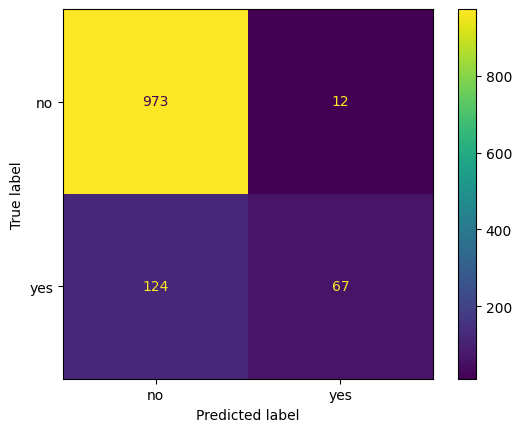

              precision    recall  f1-score   support

          no       0.89      0.99      0.93       985
         yes       0.85      0.35      0.50       191

    accuracy                           0.88      1176
   macro avg       0.87      0.67      0.72      1176
weighted avg       0.88      0.88      0.86      1176


Decision Tree - Test


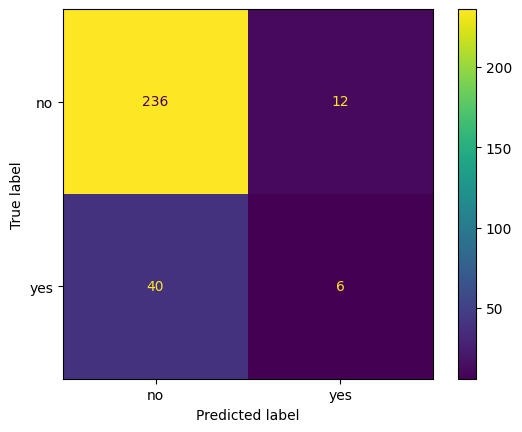

              precision    recall  f1-score   support

          no       0.86      0.95      0.90       248
         yes       0.33      0.13      0.19        46

    accuracy                           0.82       294
   macro avg       0.59      0.54      0.54       294
weighted avg       0.77      0.82      0.79       294



In [58]:
def performance_check(clf, X, y, classes):
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred, target_names=classes))

print('Decision Tree - Train')
performance_check(model_dt, X_train_final, y_train, ['no','yes'])
print('')

print('Decision Tree - Test')
performance_check(model_dt, X_test_final, y_test, ['no','yes'])

### Summary

#### X_train :

| Model         | True Positive | False Positive | True Negative | False Negative |
|---------------|---------------|----------------|---------------|----------------|
| Decision Tree | 973           | 12             | 67            | 124            |
| Random Forest | 982           | 10             | 70            | 114            |

#### X_test :

| Model         | True Positive | False Positive | True Negative | False Negative |
|---------------|---------------|----------------|---------------|----------------|
| Decision Tree | 236           | 12             | 6             | 40             |
| Random Forest | 241           | 10             | 7             | 36             |

### Recall :

| Model         | Recall Train | Recall Test | Difference |
|---------------|--------------|-------------|------------|
| Decision Tree | 0.3505       | 0.1304      | 0.2201     |
| Random Forest | 0.3793       | 0.1538      | 0.2255     |

### Precision :

| Model         | Precision Train | Precision Test | Difference |
|---------------|-----------------|----------------|------------|
| Decision Tree | 0.8485          | 0.6667         | 0.1818     |
| Random Forest | 0.8609          | 0.7            | 0.1609     |

### Akurasi :

| Model         | Akurasi Train | Akurasi Test | Difference |
|---------------|---------------|--------------|------------|
| Decision Tree | 0.8901        | 0.8434       | 0.0467     |
| Random Forest | 0.8986        | 0.8618       | 0.0368     |

### Kesimpulan
1. **Decision Tree**:
   - Model ini cenderung mengalami overfitting pada data training, karena memiliki akurasi yang sangat tinggi pada data training namun lebih rendah pada data testing.
   - Precision pada data testing cukup baik (66.67%), namun recall masih rendah (13.04%).

2. **Random Forest**:
   - Model ini memiliki performa yang lebih baik dibandingkan Decision Tree, baik pada data training maupun data testing.
   - Akurasi pada data testing adalah 86.18%, lebih tinggi dibandingkan dengan Decision Tree.
   - Precision dan recall juga lebih baik daripada Decision Tree pada data testing.

Secara keseluruhan, model Random Forest lebih unggul dalam menangani data ini dibandingkan dengan model Decision Tree, dengan akurasi dan performa metrik yang lebih baik pada data testing.


## Hyperparameter Tuning

In [59]:
# Definisikan parameter grid untuk Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Definisikan parameter grid untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV untuk Decision Tree
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                              param_grid=param_grid_dt, 
                              cv=5, 
                              n_jobs=-1, 
                              scoring='accuracy')

# Inisialisasi GridSearchCV untuk Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                              param_grid=param_grid_rf, 
                              cv=5, 
                              n_jobs=-1, 
                              scoring='accuracy')

# Fit GridSearchCV untuk Decision Tree
grid_search_dt.fit(X_train_final, y_train)
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

# Fit GridSearchCV untuk Random Forest
grid_search_rf.fit(X_train_final, y_train)
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Inisialisasi model dengan hyperparameter terbaik
best_dt = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_rf = RandomForestClassifier(**best_params_rf, random_state=42)

# Latih model dengan data training
best_dt.fit(X_train_final, y_train_encoded)
best_rf.fit(X_train_final, y_train_encoded)

print("Best parameters for Decision Tree:", best_params_dt)
print("Best cross-validation accuracy for Decision Tree:", best_score_dt)
print("\nBest parameters for Random Forest:", best_params_rf)
print("Best cross-validation accuracy for Random Forest:", best_score_rf)


Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation accuracy for Decision Tree: 0.7763901911287414

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.8477966101694916


### Kesimpulan

Model Random Forest dengan hyperparameter terbaik mencapai akurasi cross-validation sebesar 84.78%, lebih tinggi dibandingkan model Decision Tree yang mencapai 77.64%. Hyperparameter optimal untuk Random Forest termasuk `max_depth=None`, `min_samples_leaf=1`, `min_samples_split=5`, dan `n_estimators=100`. Model Random Forest menunjukkan performa yang lebih unggul dan stabil dibandingkan Decision Tree dalam prediksi attrition karyawan.


# ix. Model Saving

In [60]:
# Simpan daftar kolom numerik dan kategorikal yang telah di-encode
with open('list_num_cols.txt', 'w') as file_1:
    json.dump(selected_num_cols, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
    json.dump(selected_cat_cols, file_2)

# Simpan scaler
with open('scaler.pkl', 'wb') as file_3:
    pickle.dump(scaler, file_3)

# Simpan label encoder
with open('label_encoder.pkl', 'wb') as file_4:
    pickle.dump(label_encoder, file_4)

# Simpan model Decision Tree terbaik
with open('best_decision_tree_model.pkl', 'wb') as file_5:
    pickle.dump(best_dt, file_5)

# Simpan model Random Forest terbaik
with open('best_random_forest_model.pkl', 'wb') as file_6:
    pickle.dump(best_rf, file_6)

# x. Model Inference

In [61]:
# Muat model Decision Tree dan Random Forest
with open('best_decision_tree_model.pkl', 'rb') as file_1:
    loaded_dt = pickle.load(file_1)

with open('best_random_forest_model.pkl', 'rb') as file_2:
    loaded_rf = pickle.load(file_2)

# Muat scaler
with open('scaler.pkl', 'rb') as file_3:
    loaded_scaler = pickle.load(file_3)

# Muat label encoder
with open('label_encoder.pkl', 'rb') as file_4:
    loaded_label_encoder = pickle.load(file_4)

# Muat daftar kolom
with open('list_num_cols.txt', 'r') as file_5:
    loaded_numerical_features = json.load(file_5)

with open('list_cat_cols.txt', 'r') as file_6:
    loaded_categorical_features = json.load(file_6)

In [62]:
# Create a new DataFrame with sample data
new_data_dict = {
    'Age': [35, 42, 28, 39, 50],
    'DistanceFromHome': [5, 7, 1, 10, 3],
    'MonthlyIncome': [5000, 7000, 3000, 10000, 6000],
    'TotalWorkingYears': [10, 15, 5, 20, 18],
    'YearsAtCompany': [5, 10, 3, 12, 8],
    'YearsInCurrentRole': [3, 7, 1, 10, 6],
    'YearsSinceLastPromotion': [2, 5, 1, 3, 4],
    'YearsWithCurrentManager': [4, 8, 2, 9, 5],
    'MonthsAtCompany': [60, 120, 36, 144, 96],
    'NewPercentSalaryHike': [10, 15, 5, 20, 18],
    'Department': ['Sales', 'Research & Development', 'Sales', 'Human Resources', 'Research & Development'],
    'JobRole': ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manager', 'Healthcare Representative'],
    'JobSatisfaction': ['High', 'Medium', 'Low', 'High', 'Medium'],
    'MaritalStatus': ['Single', 'Married', 'Single', 'Married', 'Divorced']
}

new_data_df = pd.DataFrame(new_data_dict)

new_data_df

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,MonthsAtCompany,NewPercentSalaryHike,Department,JobRole,JobSatisfaction,MaritalStatus
0,35,5,5000,10,5,3,2,4,60,10,Sales,Sales Executive,High,Single
1,42,7,7000,15,10,7,5,8,120,15,Research & Development,Research Scientist,Medium,Married
2,28,1,3000,5,3,1,1,2,36,5,Sales,Laboratory Technician,Low,Single
3,39,10,10000,20,12,10,3,9,144,20,Human Resources,Manager,High,Married
4,50,3,6000,18,8,6,4,5,96,18,Research & Development,Healthcare Representative,Medium,Divorced


# xi. Pengambilan Kesimpulan